In [ ]:
#hide
from nbdev import *
from utilities.ipynb_docgen import *

# The `wtlike` package

> Code for generating fermi-LAT light curves.

### GitHub Links

- [this document](https://tburnett.github.io/wtlike/)
-  [repository](https://github.com/tburnett/wtlike)

## Introductinon

This package has code that was adapted to the [nbdev](https://nbdev.fast.ai/) code/tests/documentation environment from the [github package lat-timing](https://github.com/tburnett/lat-timing) to manage light curves of Fermi-LAT sources.  
It is based on a [paper](https://arxiv.org/pdf/1910.00140.pdf) by Matthew Kerr, which derives the [weighted likelihood formalism](https://tburnett.github.io/wtlike/loglike#The-Kerr-likelihood-formula) used here, specifically with
the [Bayesian Block](https://arxiv.org/pdf/1207.5578.pdf) to detect and characterize variability of a gamma-ray source.

Also, I've ported some code from  my [jupydoc](https://github.com/tburnett/jupydoc) documentation package supporting enhanced documentation combining Markdown and code, such that the 
Markdown reflects execution of the code.

## Installation

Note that this is still in alpha mode. 

To install from pip:

```
pip install wtlike
```
Data requirements: There are three sets of files:

- **photon data**<br> 
These are a set of weekly pickled python `dict` objects with compressed condensed photon and spacecraft data extracted from the GSFC FTP site. They contain every photon above 100 MeV, and less than $100^\circ$ 
from the zenith.

- **weight tables**<br>
Each source to be analyzed needs a table defining the photon weight as a function of position, energy, and event type. These are currently generated by pointlike. (A `fermipy`-generated version would be preferable.)

- **effective area**<br>
A standard fermi instrument response file (IRF) defining the effective area as a function of detector angle and energy. 

A set of these is available as a 1.6 GB zip file.

## Quick Demo

The following code cell loads the data for the BL Lac blazar, and plots by default, a weekly light curve for the full *fermi* mission.

SourceData: photons and exposure for BL Lac: Saving to cache with key "BL Lac_data"
	Assembling photon data and exposure for source BL Lac from folder "/home/burnett/wtlike_data/data_files",
	 with 665 files, last file:  week_674.pkl: loading all files
.........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
Load weights from file /mnt/d/wtlike/wtlike_data/weight_files/BL_Lac_weights.pkl


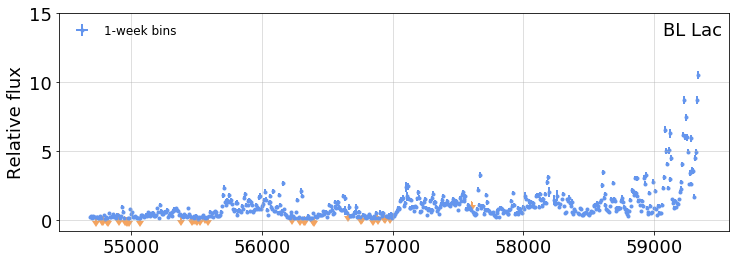

In [ ]:
from wtlike import *
weekly = WtLike('BL Lac') # how to define 7-day bins for the full dataset.
weekly.plot(ylim=(-0.8,15)); #plot takes plt.plot args.

The variable `weekly` has lots of capabilities.
To examine a subset of the data at the end of the current data, we use `view` to create a new `WtLike` object and plot it.

CellData: Bin photon data into 120 1-hour bins from 59335.0 to 59340.0
LightCurve: select 81 cells for fitting with e>0.5 & n>2


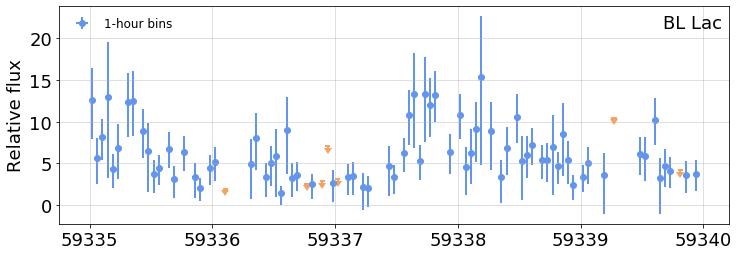

In [ ]:
hourly_at_end = weekly.view((-5,0, 1/24)) # for the last 5 days, 1-hour bins
hourly_at_end.plot(); # Accepts plt.plot args, e.g. xlim, ylim, etc.

Or, to do a Bayesian Block partition with these 1-hour bins, perform fits, and overplot the result, just run the following.

LightCurve: select 81 cells for fitting with e>0.5 & n>2
Partitioned 81 cells into 4 blocks, using LikelihoodFitness 
LightCurve: Loaded 4 / 4 cells for fitting


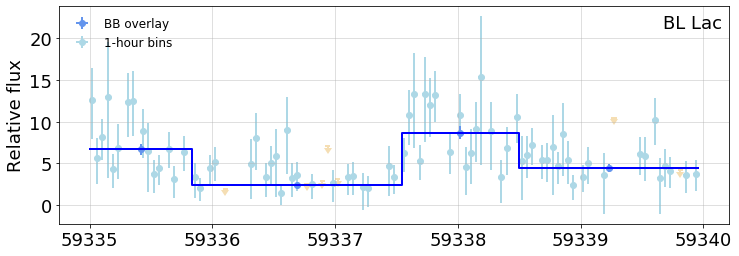

In [ ]:
bb_hourly = hourly_at_end.bb_view()
bb_hourly.plot();

Finally, let's look at the values plotted above:

In [ ]:
bb_hourly.fluxes

t    tw    n     ts  flux           errors  limit
0  59335.42  0.83  178  404.1  6.70  (-0.655, 0.689)   7.89
1  59336.69  1.71  205  170.0  2.38  (-0.308, 0.323)   2.93
2  59338.02  0.96  222  573.6  8.70  (-0.734, 0.767)  10.01
3  59339.23  1.46  217  369.4  4.48  (-0.434, 0.454)   5.25

## Input data

There are three data sources which `wtlike` needs to function:


-	The photon/spacecraft data
-	A table of weights for each source
-	An effective area IRF table 

These must be found under a folder, which by default is `~/wtlike_data`. In that folder there must be (perhaps links to) three folders named `data_files`, `weight_files`, `aeff_files`.  A copy of what I'm using is at `/afs/slac/g/glast/users/burnett/wtlike_data`

## Module summary

### Configuration [config](https://tburnett.github.io/wtlike/config)
Implements basic configuration information, [Config](https://tburnett.github.io/wtlike/config#Config), a cache system [Cache](https://tburnett.github.io/wtlike/config#Cache), point source info [PointSource](https://tburnett.github.io/wtlike/config#PointSource), and [time conversion](https://tburnett.github.io/wtlike/config#Time-conversion)

### Photon and Spacecraft Data  [data_man](https://tburnett.github.io/wtlike/data_man)
This module manages conversion of the weekly FT1 (photons) and FT2 (spacecraft) files, downloaded from  [GSFC](https://heasarc.gsfc.nasa.gov/FTP/fermi/data/lat/weekly), to a folder containing  pickled files, each with tables of photons, space craft data, and a list of GTI times derived from the FT1 file. A class [WeeklyData](https://tburnett.github.io/wtlike/data_man#WeeklyData) exports the results.

### Source data  [source_data](https://tburnett.github.io/wtlike/source_data)
The module depends on a specific source. It extracts the photons within a disk, and calculates the exposure for this direction. It assumes that a weigtht analysis has been done for this source, which it uses to apply a weight to each photon. This is handled by the class [SourceData](https://tburnett.github.io/wtlike/source_data#SourceData). It depends on [weights](https://tburnett.github.io/wtlike/weights) and [effective_ares](https://tburnett.github.io/wtlike/effective_area) to evaluate exposure.

### Cell data [cell_data](https://tburnett.github.io/wtlike/cell_data)
The next step is to define a set of time bins, or "cells". This module, implementing the class [CellData(SourceData)](https://tburnett.github.io/wtlike/cell_data#CellData), creates a set of cells.

### The light-curve  [lightcurve](https://tburnett.github.io/wtlike/lightcurve)
The the class [LightCurve(CellData)](https://tburnett.github.io/wtlike/lightcurve#LightCurve) uses the set of cells created by its superclass, and generates a likelihood function for each according to Kerr Eqn 2. These functions are represented by 3-parameter Poisson-like (see [poisson](https://tburnett.github.io/wtlike/poisson)) functions for further analysis. It creates a table with this information for plotting a light curve.

### Bayesian Blocks [bayesian](https://tburnett.github.io/wtlike/bayesian) 
This module contains the code implementing the  Bayesian block capability. 

### Simulation [simulation](https://tburnett.github.io/wtlike/simulation)
A light curve can be also generated with a simulation.

### Main [main](https://tburnett.github.io/wtlike/main)
Implements [WtLike(LightCurve)](https://tburnett.github.io/wtlike/main#WtLike/), a subclass of `LightCurve`, to which it adds the function `bb_view`, returning a new object with BB cells. Its `plot` funtion generates a light-curve plot showing the cells of its parent, overplotted tiwh the BB points.